# [ML Text Analysis] Opinion Review Clustering
#### 1. Data Preprocessing
#### 2. Feature Vectorization
#### 3. K-Means Clustering
#### 4. Word Cloud Visualization
#### 


In [1]:
import pandas as pd
import glob, os
from nltk.stem import WordNetLemmatizer
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 1. Data Preprocessing

- Data from https://archive.ics.uci.edu/ml/machine-learning-databases/opinion/

In [2]:
path = r'C:\Users\User\ML_Portfolio\files\OpinosisDataset1.0\topics'

all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

for file in all_files:
    df = pd.read_table(file, index_col=None, header=0, encoding='latin1')  

    filename_ = file.split('\\')[-1]    
    filename = filename_.split('.')[0]

    filename_list.append(filename)
    opiniontext = df.to_string().replace("   ", "")
    opinion_text.append(opiniontext)

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0but for the m..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and ve..."
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my com...
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb ....
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh..."


In [3]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

## 2. Feature Vectorizaion

In [4]:
stop_words = set(stopwords.words('english'))
stop_words.update(('ha', 'le', 'u', 'wa', 'arent', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', \
                   'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', \
                   'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'))

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words=stop_words,
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

## 3. K-Means Clustering

In [5]:
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0but for the m...",0
48,updates_garmin_nuvi_255W_gps,Another thing to consider was that I paid $50 ...,0
44,speed_windows7,"Windows 7 is quite simply faster, more stable...",0
43,speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of t...,0
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it and ...,0
41,size_asus_netbook_1005ha,A few other things I'd like to point out is th...,0
36,screen_netbook_1005ha,Keep in mind that once you get in a room full ...,0
35,screen_ipod_nano_8gb,"As always, the video screen is sharp and brigh...",0
34,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the scre...,0
33,satellite_garmin_nuvi_255W_gps,It's fast to acquire satellites .\n0 If you'v...,0


In [6]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4791)
[[0.0075056  0.00768387 0.         ... 0.00667737 0.         0.        ]
 [0.00334498 0.         0.         ... 0.         0.         0.        ]
 [0.00267374 0.         0.00173732 ... 0.         0.00191601 0.00149734]]


In [7]:
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=50):
    cluster_details = {}

    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

    for cluster_num in range(clusters_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [8]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('\nCLUSTER {0}'.format(cluster_num))
        print('Top 50 features:\n', cluster_detail['top_features'])
        print('File Names:\n',cluster_detail['filenames'][:5], 'etc.')

In [9]:
feature_names = tfidf_vect.get_feature_names_out()
cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                  feature_names=feature_names, clusters_num=3, top_n_features=50)
print_cluster_details(cluster_details)


CLUSTER 0
Top 50 features:
 ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'video', 'direction', 'feature', 'voice', 'size', 'map', 'button', 'speed', 'page', 'easy', 'font', 'speed limit', 'accurate', 'display', 'satellite', 'performance', 'eye', 'limit', 'sound', 'book', 'faster', 'update', 'use', 'turn', 'ipod', 'price', 'navigation', 'camera', 'gps', 'vista', '255w', 'garmin', 'unit', 'font size', 'new', 'window', 'window 7', 'laptop', 'fast', 'read', 'reading', 'text', 'small', 'sound quality']
File Names:
 ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle'] etc.

CLUSTER 1
Top 50 features:
 ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'car', 'transmission', 'performance', 'quality', 'ride', 'comfort', 'camry', 'toyota', 'accord', 'exterior', 'seat comfortable', 'honda', 'drive', 'uncomfortable', 'leather', 'engine', 'design', 'smooth', 's

## 4. Word Cloud Visaulization

In [10]:
cluster_details = pd.DataFrame(cluster_details).T
cluster_details

,cluster,top_features,top_features_value,filenames
0,0,"[screen, battery, keyboard, battery life, life...","[0.13486358398026863, 0.11895883604763294, 0.0...","[accuracy_garmin_nuvi_255W_gps, battery-life_a..."
1,1,"[interior, seat, mileage, comfortable, gas, ga...","[0.22815984199711048, 0.19151677991555127, 0.1...","[comfort_honda_accord_2008, comfort_toyota_cam..."
2,2,"[room, hotel, service, staff, food, location, ...","[0.26661372442798736, 0.2050956861998423, 0.18...","[bathroom_bestwestern_hotel_sfo, food_holiday_..."


In [11]:
top_features = cluster_details['top_features']
top_features_value = cluster_details['top_features_value']

In [12]:
cluster = []
for i in range(3):
    for j in range(50):
        cluster.append(i)
top_features = top_features[0] + top_features[1] + top_features[2]
top_features_value = top_features_value[0] + top_features_value[1] + top_features_value[2]

df1 = pd.DataFrame(cluster)
df2 = pd.DataFrame(top_features)
df3 = pd.DataFrame(top_features_value)

df = pd.concat([df1, df2, df3], axis=1)
df.columns = ['cluster', 'top feature', 'frequency']
df

,cluster,top feature,frequency
0,0,screen,0.134864
1,0,battery,0.118959
2,0,keyboard,0.061564
3,0,battery life,0.061422
4,0,life,0.059163
...,...,...,...
145,2,stayed,0.018247
146,2,reception,0.018030
147,2,morning,0.017888
148,2,place,0.017756


In [13]:
palettes = ['Oranges', 'Greens','Blues']

def create_wordcloud(cluster, i):
    wordcloud = WordCloud(width = 800, height = 800, 
                      colormap = palettes[i])

    frequencies = cluster.set_index('top feature').to_dict()['frequency']
    keyword = wordcloud.generate_from_frequencies(frequencies)
    array = keyword.to_array()
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.imshow(array, interpolation="bilinear")

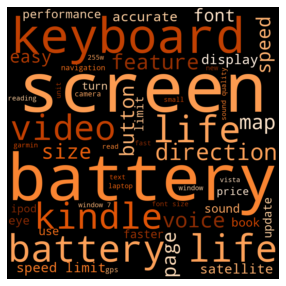

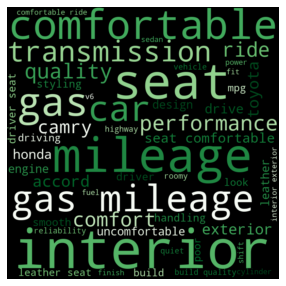

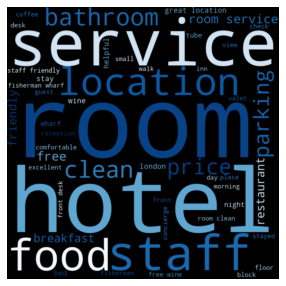

In [14]:
create_wordcloud(df[0:50], 0)
create_wordcloud(df[50:100], 1)
create_wordcloud(df[100:150], 2)